In [17]:
import re
import numpy as np
import pandas as pd
import nltk 
from textblob import TextBlob
from nltk.corpus import stopwords

### Note
My answers will be slightly different than yours because my answers ignore punctuation marks & don't count them as words.

In [18]:
textTotal = open('RomeoJuliet.txt').read()
blobTotal = TextBlob(textTotal)
numChars = 1000
text1000 = textTotal[0:numChars+1]
blob1000 = TextBlob(text1000)

In [19]:
# Problem 1
def print_10_words(blob):
    i = 0
    while i < len(blob.words):
        print(blob.words[i:i+10], "\n")
        i += 10
print_10_words(blob1000)        

['Project', 'Gutenbergâ€™s', 'Romeo', 'and', 'Juliet', 'by', 'William', 'Shakespeare', 'This', 'eBook'] 

['is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United'] 

['States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no'] 

['cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy'] 

['it', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms'] 

['of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or'] 

['online', 'at', 'www.gutenberg.org', 'If', 'you', 'are', 'not', 'located', 'in', 'the'] 

['United', 'States', 'youâ€™ll', 'have', 'to', 'check', 'the', 'laws', 'of', 'the'] 

['country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', 'Title'] 

['Romeo', 'and', 'Juliet', 'Author', 'William', 'Shakespeare', 'Release', 'Date', 'November', '1998'] 

['Etext', '1513', 'Last', 'Updated', 'January', '30', '2019', 'Language', 'English', 'Charact

In [20]:
# Problem 2
print("# of words in the entire text:", len(blobTotal.words))

# of words in the entire text: 29270


In [21]:
# Problem 3
unique_words = dict(blobTotal.word_counts.items())
print("# of unique words in the entire text:", len(unique_words.keys()))

# of unique words in the entire text: 4326


In [22]:
# Problem 4
stop_words = stopwords.words('english')
without_stopwords = []
for word in unique_words.keys():
    if word not in stop_words:
        without_stopwords.append(word)
        
print("# of unique words EXCLUDING stop words:", len(without_stopwords))

# of unique words EXCLUDING stop words: 4200


In [23]:
# Problem 5 
from operator import itemgetter
sorted_words = sorted(list(blobTotal.word_counts.items()), key = itemgetter(1), reverse = True)
numberTopwords= 10
top10Words = sorted_words[0:numberTopwords]
df = pd.DataFrame(top10Words, columns = ['words', 'frequency'])
df

,words,frequency
0,the,876
1,and,809
2,to,624
3,i,582
4,a,543
5,of,519
6,in,395
7,is,367
8,you,364
9,that,361


In [24]:
# Problem 6
blob_wordCount = dict(blobTotal.word_counts.items())
new_dict = {}
for word in blob_wordCount.keys():
    if word not in stop_words:
        d = {word: blob_wordCount[word]}
        new_dict.update(d)
new_dict_df = pd.DataFrame({'Words': list(new_dict.keys()), 'Frequency': list(new_dict.values())})
new_dict_df.sort_values(by=['Frequency'], ascending=False).head(10)

,Words,Frequency
2,romeo,304
230,thou,277
3,juliet,183
280,thy,170
126,nurse,149
119,capulet,141
244,thee,138
191,love,137
205,shall,112
111,lady,109


In [25]:
# Problem 7
i = 0
while i < len(blob1000.noun_phrases):
    print(blob1000.noun_phrases[i:i+3], "\n")
    i += 3

['project gutenbergâ€™s romeo', 'juliet', 'william shakespeare'] 

['restrictions whatsoever', 'project gutenberg license', 'title'] 

['romeo', 'juliet author', 'william shakespeare release date'] 

['november', 'etext', 'updated'] 

['january', 'language', 'english character'] 

['utf-8', 'start of this project gutenberg ebook romeo and juliet', 'pg shakespeare team'] 

['project gutenberg', 'the tragedy of romeo and juliet', 'william shakespeare contents the prologue'] 

['act', 'scene', 'public place'] 

['scene ii'] 



In [26]:
# Problem 8 
print("# of noun phrases in the entire text:", len(blobTotal.noun_phrases))

# of noun phrases in the entire text: 4640


In [27]:
# Problem 9 
noun_phrases = blobTotal.noun_phrases
np_df = pd.DataFrame(pd.Series(noun_phrases).value_counts().reset_index())
np_df.columns = ['Nouns', 'Frequency']
np_df.sort_values(by=['Frequency'], ascending=False).head(10)

,Nouns,Frequency
0,romeo,280
1,juliet,167
2,nurse,131
3,capulet,86
4,mercutio,81
5,benvolio,72
6,iâ€™ll,71
7,tybalt,67
8,friar lawrence,59
9,paris,53


In [28]:
# Problem 10
wa_words = []
for word in blobTotal.words:
    if 'WA' in word:
        wa_words.append(word)
print(wa_words)

['WATCH', 'WATCH', 'WATCH', 'WATCH', 'WATCH', 'WATCH', 'WATCH', 'WATCH', 'WARRANTY', 'WARRANTY', 'WARRANTIES', 'WARRANTIES']


In [34]:
# Problem 11
import imageio
from wordcloud import WordCloud

file_name = 'mask_heart.png'
mask_image = imageio.imread(str(file_name))
wordcloud = WordCloud(colormap = 'prism', mask=mask_image, background_color='white')
wordcloudImage = wordcloud.generate(textTotal)
#wordcloudFile = wordcloudImage.to_file('Hamlet.png')

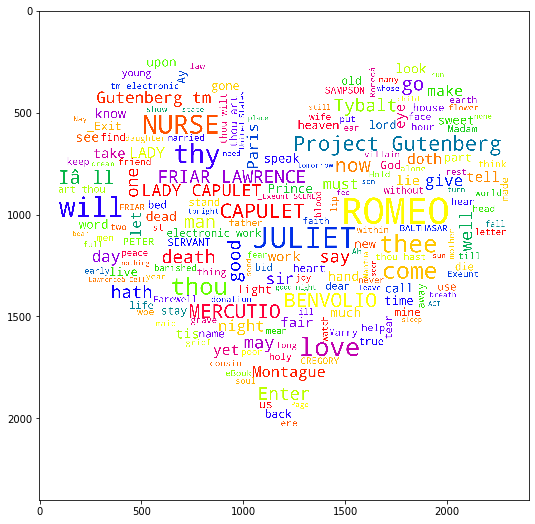

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open('Hamlet.png')
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(im)
plt.show()